
Eighevalues 
[ 4.77693015  2.32858463  1.42578848  0.98160744  1.01555075  0.61483396
  0.58221005  0.08984959  0.36637868  0.29311256  0.17229113  0.24282059
  0.21573305]


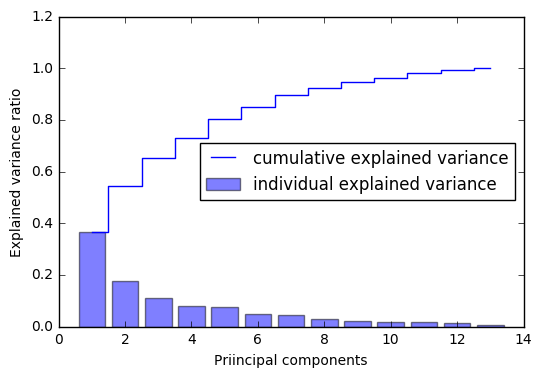

In [12]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split #划分训练集和测试集
from sklearn.preprocessing import StandardScaler #对数据进行标准化
import matplotlib.pyplot as plt



#加载数据
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

#划分为测试集和训练集

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#对数据scaling，只处理X，Y不用处理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

cov_mat = np.cov(X_train_std.T)
eigen_values,eigen_vecotors = np.linalg.eig(cov_mat)
print('\nEighevalues \n%s' % eigen_values)

## 画eigen_value explained ratio

tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Priincipal components')
plt.legend(loc='best')
plt.show()



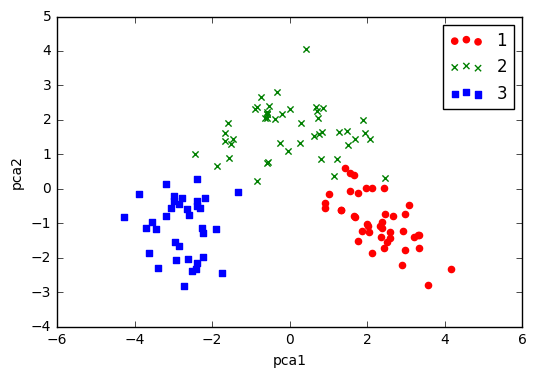

In [32]:
eigen_paris = [(np.abs(eigen_values[i]),eigen_vecotors[:,i]) for i in range(len(eigen_values))]
eigen_paris.sort(reverse=True) #按照特征值进行排序

#print(eigen_paris[1][1].shape)
#print(eigen_paris[1][1][:,np.newaxis].shape) 
m = np.hstack([eigen_paris[0][1][:,np.newaxis],eigen_paris[1][1][:,np.newaxis]]) #先把(13,)的转为(13,1)再合并
X_train_pca = X_train_std.dot(m) #PCA降维
#print(X_train_pca[1:10])

#显示降维后的数据。
#对三类数据分别用不同的颜色和标记显示
colors = ['r','g','b']
markers = ['o','x','s']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                color=c,marker=m,label=l)
    
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend(loc='best')
plt.show()


In [38]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

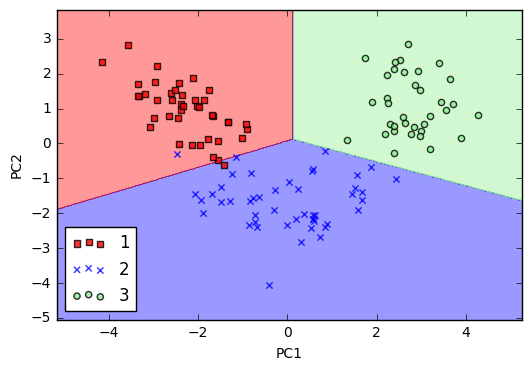

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

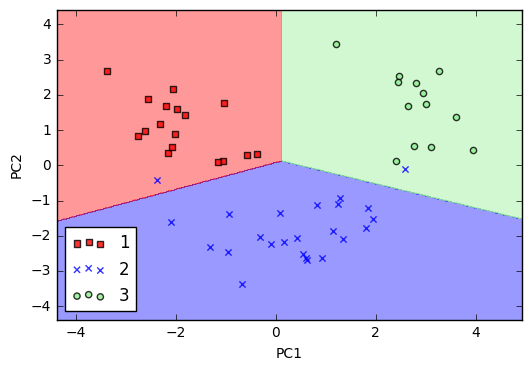

In [42]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()